<a href="https://colab.research.google.com/github/VishakBharadwaj94/so_many_cats_dogs/blob/master/cats_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 16

In [6]:
path = untar_data(URLs.PETS); path

PosixPath('/content/data/oxford-iiit-pet')

We are going to use the Oxford-IIIT Pet Dataset by O. M. Parkhi et al., 2012 which features 12 cat breeds and 25 dogs breeds. Our model will need to learn to differentiate between these 37 distinct categories. According to their paper, the best accuracy they could get in 2012 was 59.21%, using a complex model that was specific to pet detection, with separate "Image", "Head", and "Body" models for the pet photos. Let's see how accurate we can be using deep learning!

We are going to use the untar_data function to which we must pass a URL as an argument and which will download and extract the data.

In [7]:
path.ls()

[PosixPath('/content/data/oxford-iiit-pet/annotations'),
 PosixPath('/content/data/oxford-iiit-pet/images')]

In [8]:
files = get_image_files((path/'images'))
files[:5]

[PosixPath('/content/data/oxford-iiit-pet/images/pomeranian_113.jpg'),
 PosixPath('/content/data/oxford-iiit-pet/images/beagle_164.jpg'),
 PosixPath('/content/data/oxford-iiit-pet/images/japanese_chin_16.jpg'),
 PosixPath('/content/data/oxford-iiit-pet/images/samoyed_53.jpg'),
 PosixPath('/content/data/oxford-iiit-pet/images/Bombay_141.jpg')]

In [0]:
re = r'/([^/]+)_\d+.jpg$'

In [0]:
data =ImageDataBunch.from_name_re(path/'images',files,re,ds_tfms=get_transforms(),bs=bs,size=224).normalize(imagenet_stats)

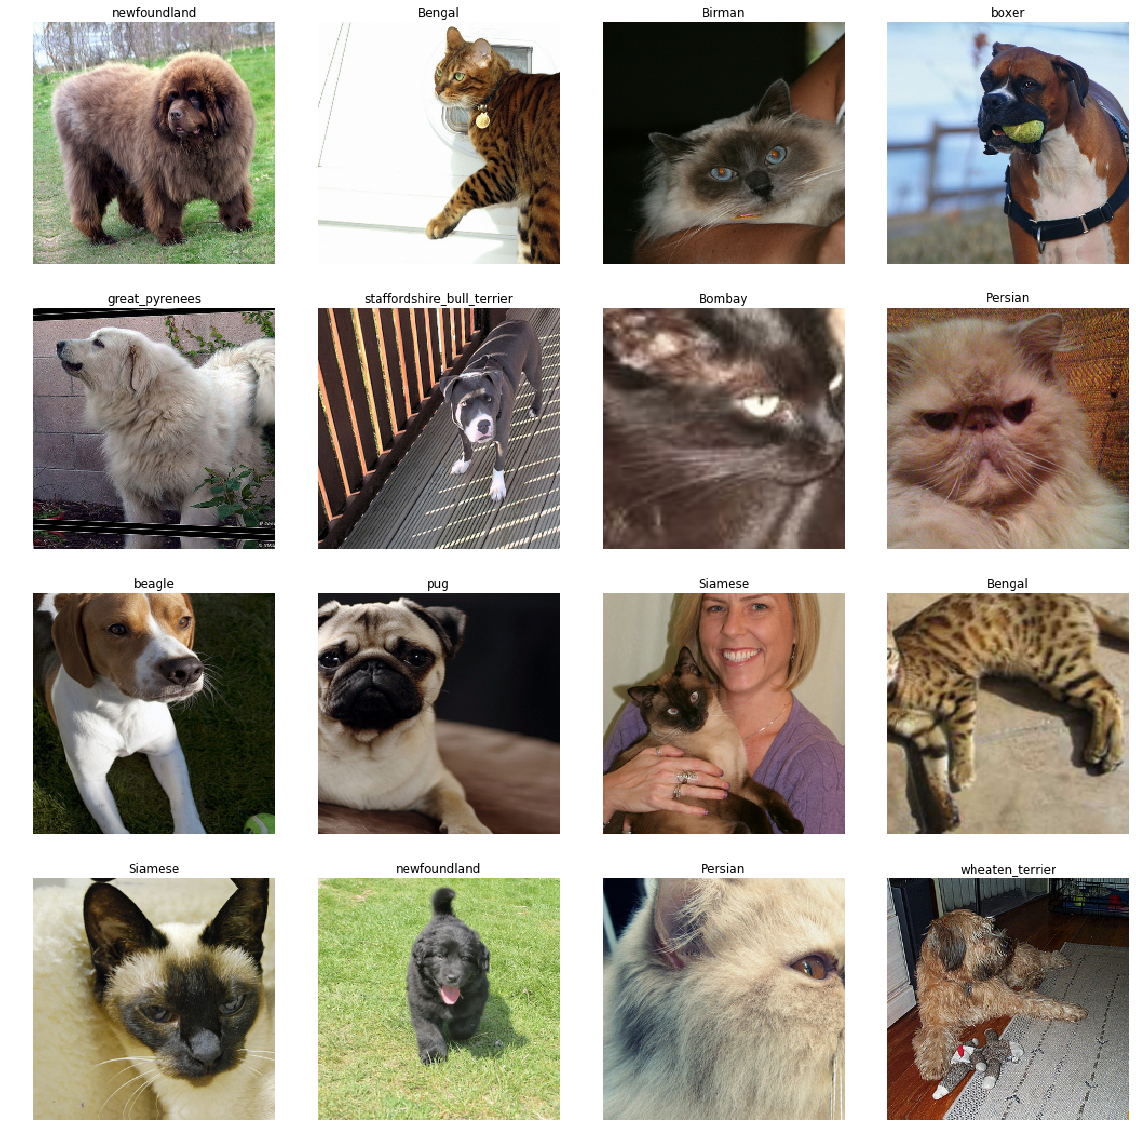

In [14]:
data.show_batch()

In [15]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 52958982.83it/s]


In [17]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.774225,0.349050,0.117050,02:12
1,0.557646,0.270336,0.088633,02:12
2,0.408352,0.231413,0.078484,02:11
3,0.359205,0.203882,0.064276,02:12


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [29]:
interp.most_confused()

[('basset_hound', 'beagle', 7),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5),
 ('Egyptian_Mau', 'Bengal', 4),
 ('Ragdoll', 'Birman', 4),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 4),
 ('beagle', 'basset_hound', 4),
 ('Bengal', 'Abyssinian', 3),
 ('Birman', 'Ragdoll', 3),
 ('British_Shorthair', 'Russian_Blue', 3),
 ('Maine_Coon', 'Bengal', 3),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('miniature_pinscher', 'chihuahua', 3),
 ('Birman', 'Persian', 2),
 ('British_Shorthair', 'Ragdoll', 2),
 ('Persian', 'Ragdoll', 2),
 ('Ragdoll', 'Siamese', 2),
 ('american_bulldog', 'beagle', 2),
 ('beagle', 'american_bulldog', 2),
 ('boxer', 'pug', 2),
 ('english_cocker_spaniel', 'english_setter', 2),
 ('saint_bernard', 'beagle', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2),
 ('wheaten_terrier', 'great_pyrenees', 2),
 ('Abyssinian', 'Russian_Blue', 1),
 ('Bengal', 'Bombay', 1),
 ('Bengal', 'Egyptian_Mau', 1),
 ('Bengal', 'Maine_Coon', 1),
